## 1.Web scraping with BeautifulSoup

In [124]:
from bs4 import BeautifulSoup as bs4
import requests  #to get content of a url 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import urllib.request

import re
import os

import random 
import string

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.calibration import CalibratedClassifierCV


# Build Pipeline
from sklearn.pipeline import Pipeline

# Save Model & Pipeline
import joblib


In [3]:
#Scraping the first page 
url ='http://books.toscrape.com/catalogue/page-1.html'
page = requests.get(url)
soup = bs4(page.text, 'html.parser')
print(soup.prettify())  #prettify() : show exact structure of the html doc

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:30" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="../static/oscar/css/styles.css" rel="stylesheet" typ

In [4]:
#Get all urls
urls = []
for a in soup.find_all('a', href=True):
    urls.append(a['href'])
    print (a['href'])

../index.html
../index.html
category/books_1/index.html
category/books/travel_2/index.html
category/books/mystery_3/index.html
category/books/historical-fiction_4/index.html
category/books/sequential-art_5/index.html
category/books/classics_6/index.html
category/books/philosophy_7/index.html
category/books/romance_8/index.html
category/books/womens-fiction_9/index.html
category/books/fiction_10/index.html
category/books/childrens_11/index.html
category/books/religion_12/index.html
category/books/nonfiction_13/index.html
category/books/music_14/index.html
category/books/default_15/index.html
category/books/science-fiction_16/index.html
category/books/sports-and-games_17/index.html
category/books/add-a-comment_18/index.html
category/books/fantasy_19/index.html
category/books/new-adult_20/index.html
category/books/young-adult_21/index.html
category/books/science_22/index.html
category/books/poetry_23/index.html
category/books/paranormal_24/index.html
category/books/art_25/index.html
categ

In [5]:
#Get categories from urls
categories_urls = []
categories = []
for url in urls: 
    if url.startswith('category/books/'):
        categories_urls.append(url)
        c = re.search('books/(.+?)_', url)
        categories.append(c.group(1))

In [6]:
categories_urls

['category/books/travel_2/index.html',
 'category/books/mystery_3/index.html',
 'category/books/historical-fiction_4/index.html',
 'category/books/sequential-art_5/index.html',
 'category/books/classics_6/index.html',
 'category/books/philosophy_7/index.html',
 'category/books/romance_8/index.html',
 'category/books/womens-fiction_9/index.html',
 'category/books/fiction_10/index.html',
 'category/books/childrens_11/index.html',
 'category/books/religion_12/index.html',
 'category/books/nonfiction_13/index.html',
 'category/books/music_14/index.html',
 'category/books/default_15/index.html',
 'category/books/science-fiction_16/index.html',
 'category/books/sports-and-games_17/index.html',
 'category/books/add-a-comment_18/index.html',
 'category/books/fantasy_19/index.html',
 'category/books/new-adult_20/index.html',
 'category/books/young-adult_21/index.html',
 'category/books/science_22/index.html',
 'category/books/poetry_23/index.html',
 'category/books/paranormal_24/index.html',
 '

In [7]:
categories

['travel',
 'mystery',
 'historical-fiction',
 'sequential-art',
 'classics',
 'philosophy',
 'romance',
 'womens-fiction',
 'fiction',
 'childrens',
 'religion',
 'nonfiction',
 'music',
 'default',
 'science-fiction',
 'sports-and-games',
 'add-a-comment',
 'fantasy',
 'new-adult',
 'young-adult',
 'science',
 'poetry',
 'paranormal',
 'art',
 'psychology',
 'autobiography',
 'parenting',
 'adult-fiction',
 'humor',
 'horror',
 'history',
 'food-and-drink',
 'christian-fiction',
 'business',
 'biography',
 'thriller',
 'contemporary',
 'spirituality',
 'academic',
 'self-help',
 'historical',
 'christian',
 'suspense',
 'short-stories',
 'novels',
 'health',
 'politics',
 'cultural',
 'erotica',
 'crime']

In [9]:
m = len(categories)
m

50

In [10]:
category_pages = []
title_pages = []
price_pages = []
star_pages = []
urls_pages =[]
categories_col = []
n = 0

for i in range(0,m):
    url = 'http://books.toscrape.com/catalogue/'+ categories_urls[i]
    category_pages.append(url)
        

for item in category_pages:
    page = requests.get(item)
    soup = bs4(page.text, 'html.parser')
    #print(soup.prettify())  #prettify() : show exact structure of the html doc
    for i in soup.findAll('h3'): 
            ttl = i.getText()   #get title of book 
            title_pages.append(ttl)
            categories_col.append(categories[n])
    n+=1
        
    for j in soup.findAll('p', class_='price_color') :  #class_, otherwise it sees it as a class
        price = j.getText()  #get price of book
        newprice = price.replace('Â£','')
        price_pages.append(float(newprice))
        
    for s in soup.findAll('p', class_='star-rating'):
        for k,v in s.attrs.items():   #k : class , v=['star-rating','One'] for exple
            star = v[1]   #get star rating of book
            star_pages.append(star)
            
    divs = soup.findAll('div', class_='image_container')
    for thumbs in divs : 
        tgs = thumbs.find('img', class_='thumbnail')
        urls = 'http://books.toscrape.com/'+ str(tgs['src'])
        newurls = urls.replace('../','')
        urls_pages.append(newurls)

In [32]:
data = {'Title':title_pages, 'Price': price_pages, 'Star':star_pages, 'Url':urls_pages,'Categories':
         categories_col}


In [33]:
df = pd.DataFrame(data)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       517 non-null    object 
 1   Price       517 non-null    float64
 2   Star        517 non-null    object 
 3   Url         517 non-null    object 
 4   Categories  517 non-null    object 
dtypes: float64(1), object(4)
memory usage: 20.3+ KB


In [14]:
df.head(15)

,Title,Price,Star,Url,Categories
0,It's Only the Himalayas,45.17,Two,http://books.toscrape.com/media/cache/27/a5/27...,travel
1,Full Moon over Noahâs ...,49.43,Four,http://books.toscrape.com/media/cache/57/77/57...,travel
2,See America: A Celebration ...,48.87,Three,http://books.toscrape.com/media/cache/9a/7e/9a...,travel
3,Vagabonding: An Uncommon Guide ...,36.94,Two,http://books.toscrape.com/media/cache/d5/bf/d5...,travel
4,Under the Tuscan Sun,37.33,Three,http://books.toscrape.com/media/cache/98/c2/98...,travel
5,A Summer In Europe,44.34,Two,http://books.toscrape.com/media/cache/4e/15/4e...,travel
6,The Great Railway Bazaar,30.54,One,http://books.toscrape.com/media/cache/76/de/76...,travel
7,A Year in Provence ...,56.88,Four,http://books.toscrape.com/media/cache/db/46/db...,travel
8,The Road to Little ...,23.21,One,http://books.toscrape.com/media/cache/e0/4f/e0...,travel
9,Neither Here nor There: ...,38.95,Three,http://books.toscrape.com/media/cache/06/81/06...,travel


In [ ]:
##-------------FOR THE PURPOSE OF A CLEARER VISUALIZATION ON THE APP INTERFACE, LET'S TAKE 100 ROWS-----------------------

In [15]:
df_out = df[0:100] 

In [16]:
df_out.to_excel('books.xlsx', index=False)

In [ ]:
##----------------------------------------------------------------------------------------------------------

## 2.Data Exploration

In [21]:
#Number of books per category
df['Categories'].value_counts()

historical-fiction    20
young-adult           20
sequential-art        20
nonfiction            20
fantasy               20
food-and-drink        20
default               20
childrens             20
add-a-comment         20
romance               20
fiction               20
mystery               20
poetry                19
classics              19
history               18
horror                17
womens-fiction        17
science-fiction       16
science               14
music                 13
business              12
thriller              11
travel                11
philosophy            11
humor                 10
autobiography          9
art                    8
religion               7
psychology             7
christian-fiction      6
new-adult              6
spirituality           6
sports-and-games       5
biography              5
self-help              5
health                 4
christian              3
contemporary           3
politics               3
historical             2


In [22]:
#Average price per category
yp=df.groupby('Categories')['Price'].mean()
yp

Categories
academic              13.120000
add-a-comment         34.643000
adult-fiction         15.360000
art                   38.520000
autobiography         37.053333
biography             33.662000
business              32.460000
childrens             36.402500
christian             42.496667
christian-fiction     34.385000
classics              36.545263
contemporary          36.200000
crime                 10.970000
cultural              36.580000
default               35.024000
erotica               19.190000
fantasy               39.654000
fiction               37.696500
food-and-drink        31.399000
health                51.452500
historical            22.830000
historical-fiction    35.379000
history               37.295000
horror                35.949412
humor                 33.501000
music                 35.636923
mystery               32.794000
new-adult             46.383333
nonfiction            32.690000
novels                54.810000
paranormal            15.4000

In [23]:
#First 3 categories, price descending
yp.nlargest(3)  

Categories
suspense    58.330000
novels      54.810000
politics    53.613333
Name: Price, dtype: float64

In [24]:
#Books with 5 stars 
dff = df.loc[df['Star']=='Five'] 

In [25]:
dff.head()

,Title,Price,Star,Url,Categories
10,"1,000 Places to See ...",26.08,Five,http://books.toscrape.com/media/cache/d7/0f/d7...,travel
19,A Time of Torment ...,48.35,Five,http://books.toscrape.com/media/cache/e8/c0/e8...,mystery
28,What Happened on Beale ...,25.37,Five,http://books.toscrape.com/media/cache/c7/ab/c7...,mystery
29,The Bachelor Girl's Guide ...,52.30,Five,http://books.toscrape.com/media/cache/95/d7/95...,mystery
33,A Flight of Arrows ...,55.53,Five,http://books.toscrape.com/media/cache/82/96/82...,historical-fiction


In [26]:
#Number of 5 star books per category
ys=dff.groupby('Categories')['Star'].count()
ys

Categories
add-a-comment         3
adult-fiction         1
art                   1
autobiography         3
business              3
childrens             3
christian             1
christian-fiction     3
contemporary          1
default               2
erotica               1
fantasy               5
fiction               6
food-and-drink        4
health                2
historical            1
historical-fiction    5
history               4
horror                2
humor                 4
music                 4
mystery               3
new-adult             2
nonfiction            4
novels                1
philosophy            2
poetry                6
religion              1
romance               3
science               2
science-fiction       1
self-help             1
sequential-art        2
spirituality          3
sports-and-games      1
thriller              2
travel                1
womens-fiction        4
young-adult           6
Name: Star, dtype: int64

In [27]:
#First 5 categories with max number of 5 stars
ys.nlargest(5)

Categories
fiction               6
poetry                6
young-adult           6
fantasy               5
historical-fiction    5
Name: Star, dtype: int64

## 3.Data Visualization 

In [28]:
#Create folder 'images' to store visualizations
IMAGES_PATH = os.path.join("images")
os.makedirs(IMAGES_PATH, exist_ok=True)    

In [29]:
#Function that will save visualizations into 'images' folder
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure img


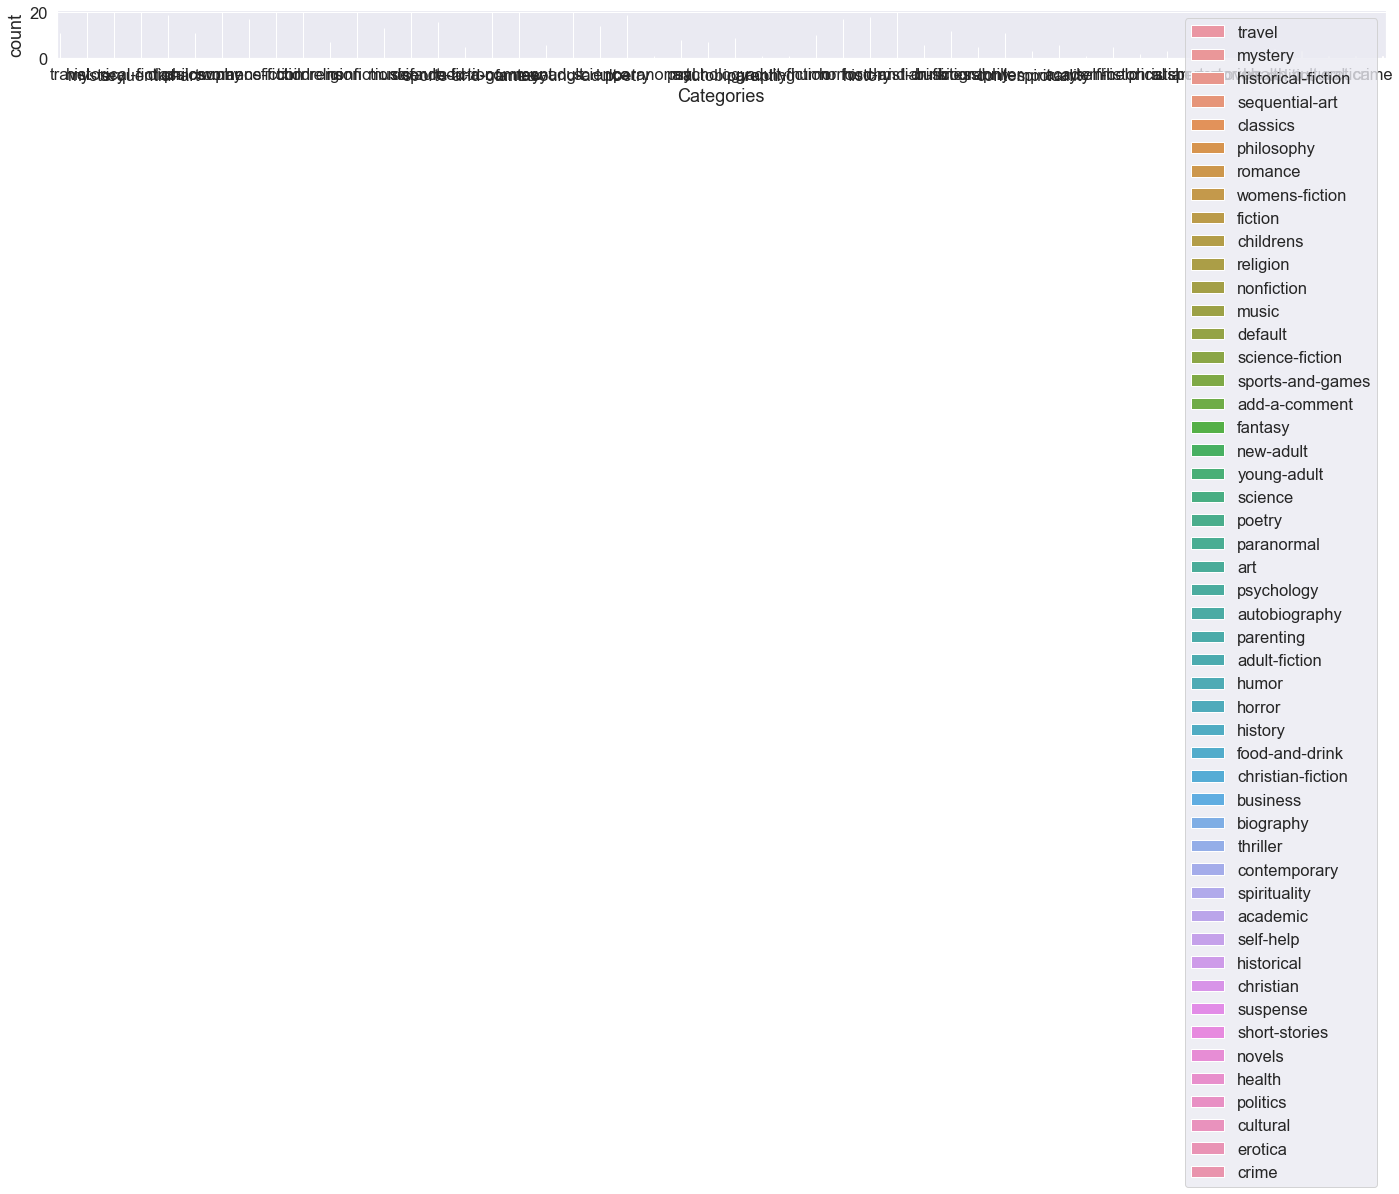

In [30]:
#Display number of books/category 
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
sns.set_context('notebook',font_scale=1.5)
img1 = sns.countplot(x='Categories',hue="Categories",data=df)
plt.legend(loc='upper right')
save_fig('img1')

In [35]:
#For a clearer visualization : 
dff = df[0:100]
df.head()

,Title,Price,Star,Url,Categories
0,It's Only the Himalayas,45.17,Two,http://books.toscrape.com/media/cache/27/a5/27...,travel
1,Full Moon over Noahâs ...,49.43,Four,http://books.toscrape.com/media/cache/57/77/57...,travel
2,See America: A Celebration ...,48.87,Three,http://books.toscrape.com/media/cache/9a/7e/9a...,travel
3,Vagabonding: An Uncommon Guide ...,36.94,Two,http://books.toscrape.com/media/cache/d5/bf/d5...,travel
4,Under the Tuscan Sun,37.33,Three,http://books.toscrape.com/media/cache/98/c2/98...,travel


Saving figure img1


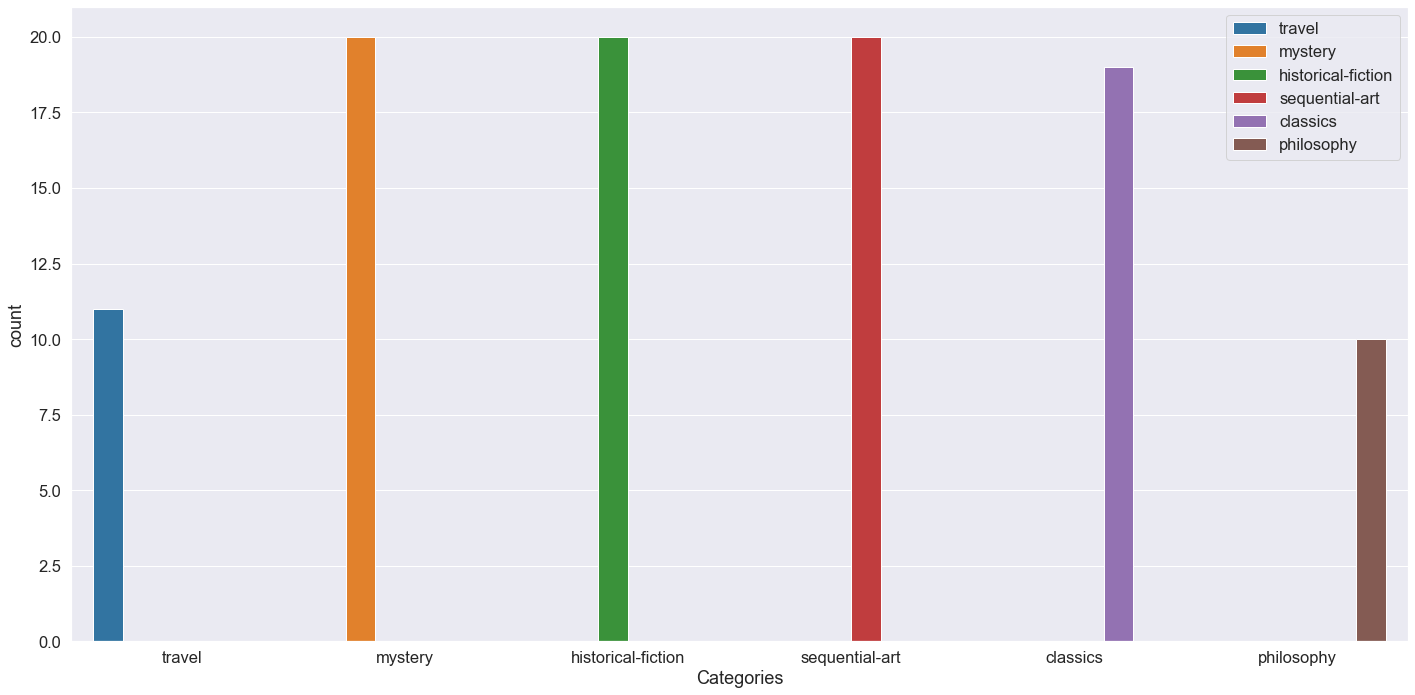

In [36]:
#Display number of books/category 
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
sns.set_context('notebook',font_scale=1.5)
img1 = sns.countplot(x='Categories',hue="Categories",data=dff)
plt.legend(loc='upper right')
save_fig('img1')

No handles with labels found to put in legend.


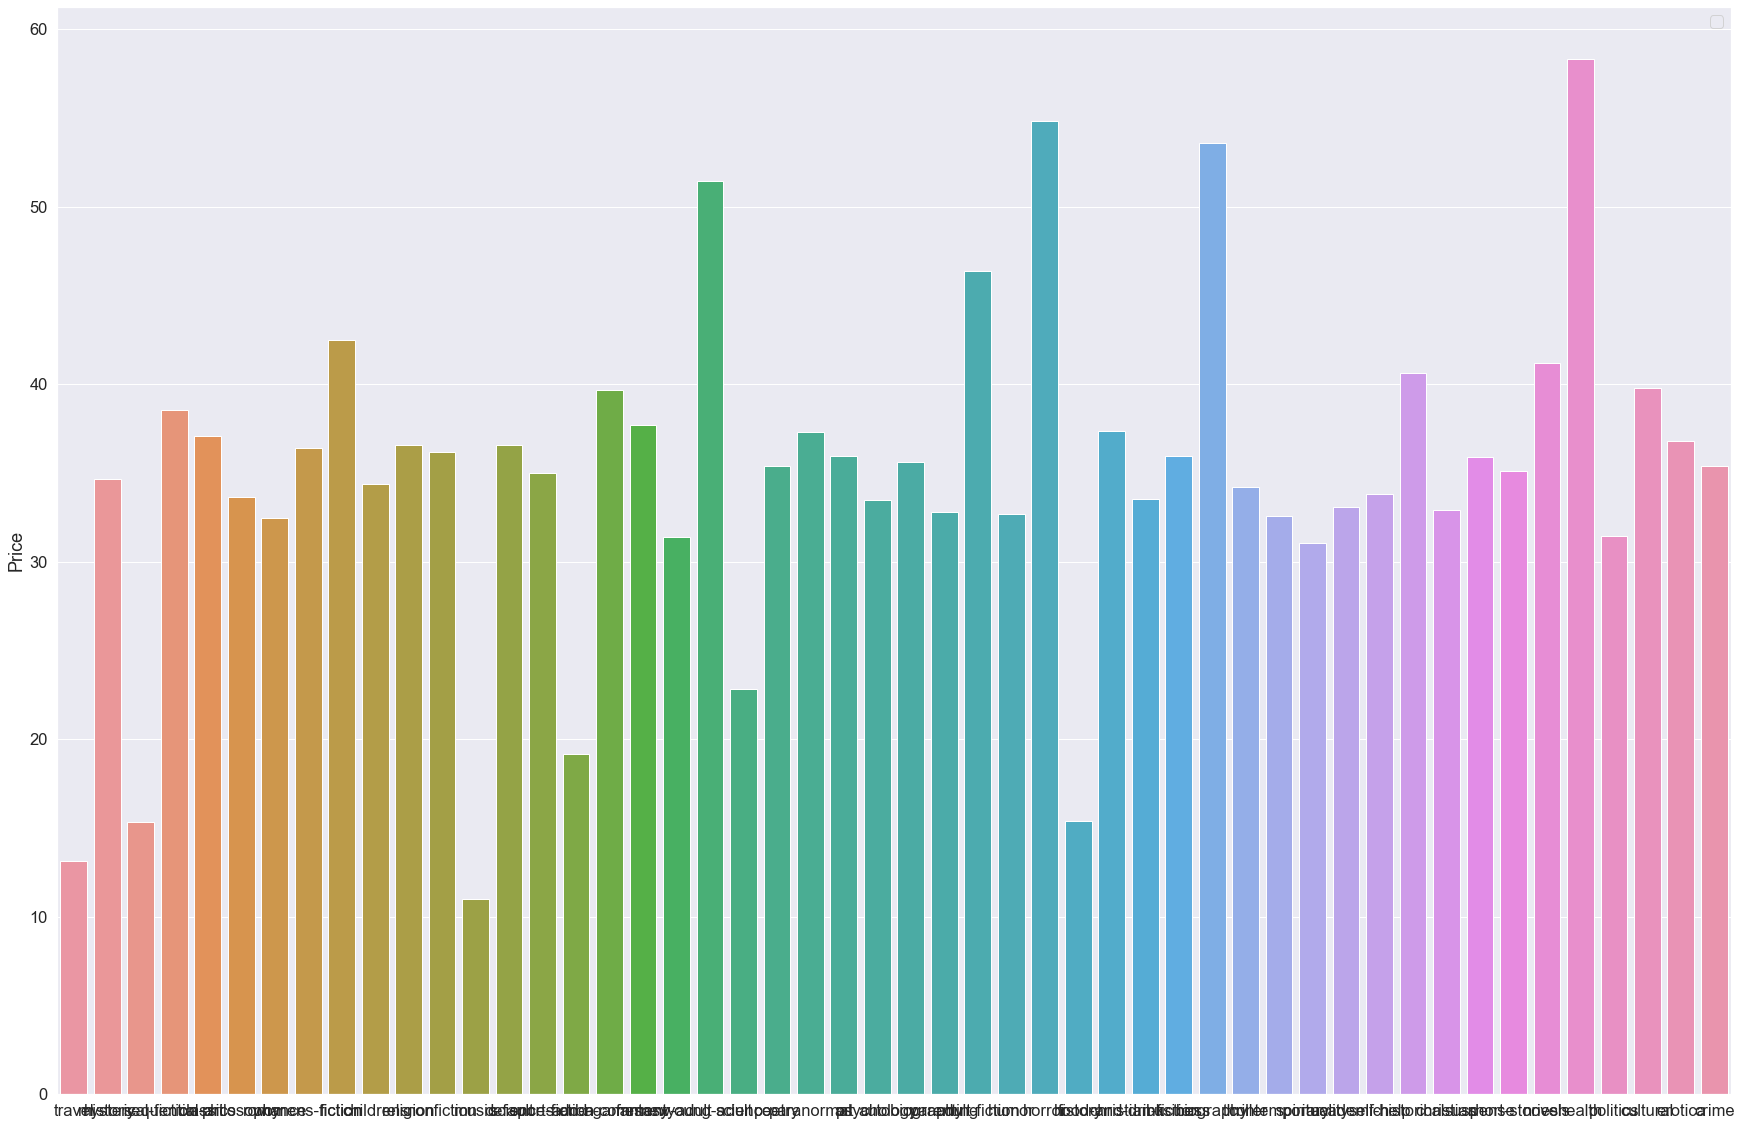

In [37]:
#Distribution of avg prices/category
plt.figure(figsize=(30,20))
sns.barplot(x=categories, y=yp)
plt.legend(loc='upper right')

In [41]:
#Same: let's take dff
#Average price per category
df1 = pd.DataFrame({'Average price': dff.groupby('Categories')['Price'].mean()}).reset_index()
df1

,Categories,Average price
0,classics,36.545263
1,historical-fiction,35.379000
2,mystery,32.794000
3,philosophy,32.576000
4,sequential-art,32.919500
5,travel,39.794545


Saving figure img2


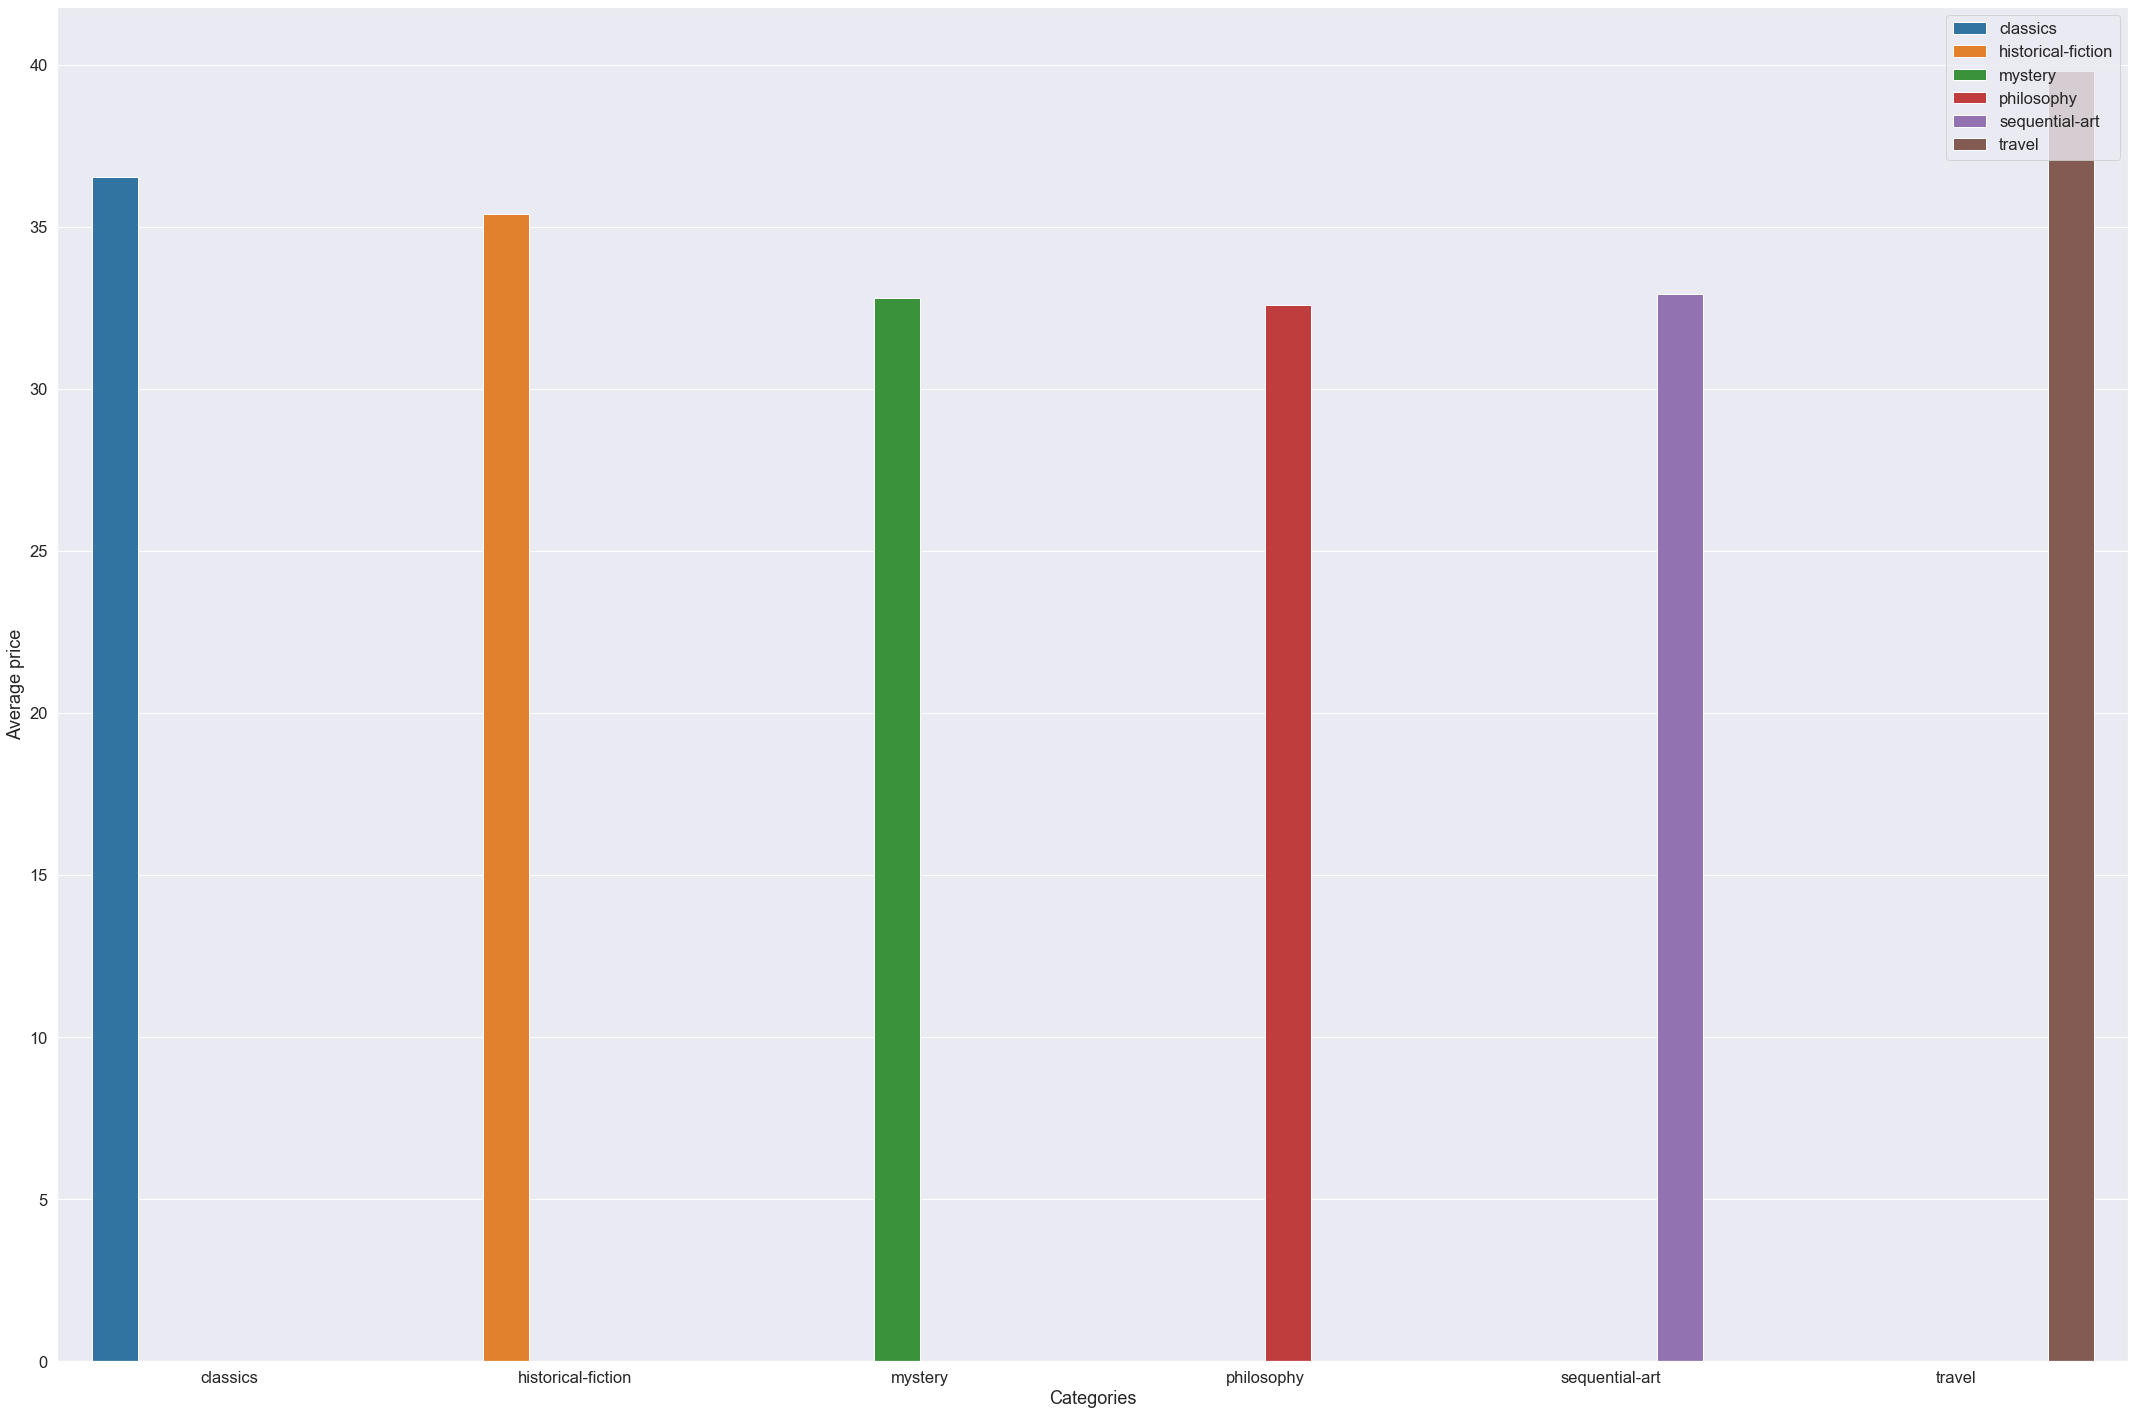

In [46]:
#Distribution of avg prices/category
plt.figure(figsize=(30,20))
img2 = sns.barplot(x='Categories', y='Average price', hue='Categories',data=df1)
plt.legend(loc='upper right')
save_fig('img2')

Saving figure img3


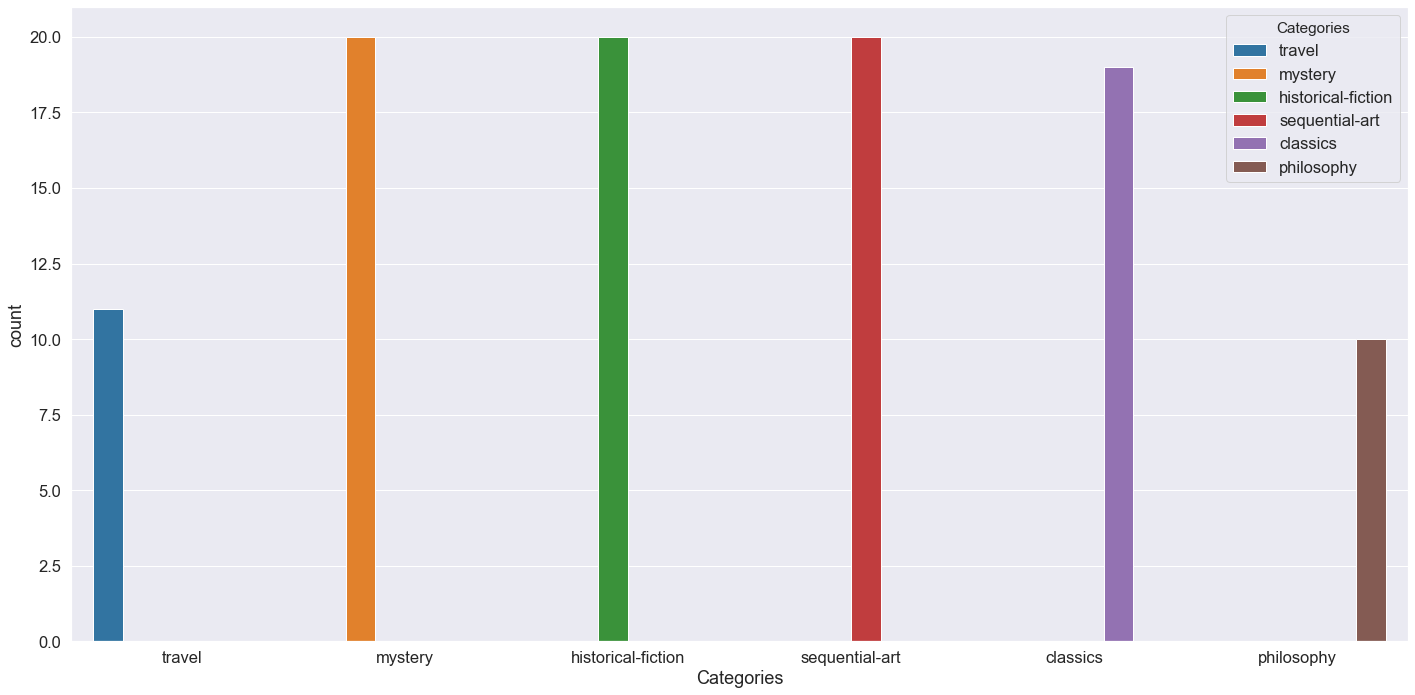

In [48]:
#Number of books that got 5 stars/category
plt.figure(figsize=(20,10))
sns.set_context('notebook',font_scale=1.5)
img3 = sns.countplot(x='Categories',hue='Categories', data=dff)
save_fig('img3')

## 4.Data Modeling

In [49]:
df['Clean_Title'] = df['Title'].apply(nfx.remove_userhandles)

In [50]:
df['Clean_Title'] = df['Clean_Title'].apply(nfx.remove_stopwords)

In [51]:
df.head(15)

,Title,Price,Star,Url,Categories,Clean_Title
0,It's Only the Himalayas,45.17,Two,http://books.toscrape.com/media/cache/27/a5/27...,travel,Himalayas
1,Full Moon over Noahâs ...,49.43,Four,http://books.toscrape.com/media/cache/57/77/57...,travel,Moon Noahâs ...
2,See America: A Celebration ...,48.87,Three,http://books.toscrape.com/media/cache/9a/7e/9a...,travel,America: Celebration ...
3,Vagabonding: An Uncommon Guide ...,36.94,Two,http://books.toscrape.com/media/cache/d5/bf/d5...,travel,Vagabonding: Uncommon Guide ...
4,Under the Tuscan Sun,37.33,Three,http://books.toscrape.com/media/cache/98/c2/98...,travel,Tuscan Sun
5,A Summer In Europe,44.34,Two,http://books.toscrape.com/media/cache/4e/15/4e...,travel,Summer Europe
6,The Great Railway Bazaar,30.54,One,http://books.toscrape.com/media/cache/76/de/76...,travel,Great Railway Bazaar
7,A Year in Provence ...,56.88,Four,http://books.toscrape.com/media/cache/db/46/db...,travel,Year Provence ...
8,The Road to Little ...,23.21,One,http://books.toscrape.com/media/cache/e0/4f/e0...,travel,Road Little ...
9,Neither Here nor There: ...,38.95,Three,http://books.toscrape.com/media/cache/06/81/06...,travel,There: ...


In [52]:
df = df.drop(14)  #Let's delete row 14 and keep it for the test 

In [53]:
df.head(15)

,Title,Price,Star,Url,Categories,Clean_Title
0,It's Only the Himalayas,45.17,Two,http://books.toscrape.com/media/cache/27/a5/27...,travel,Himalayas
1,Full Moon over Noahâs ...,49.43,Four,http://books.toscrape.com/media/cache/57/77/57...,travel,Moon Noahâs ...
2,See America: A Celebration ...,48.87,Three,http://books.toscrape.com/media/cache/9a/7e/9a...,travel,America: Celebration ...
3,Vagabonding: An Uncommon Guide ...,36.94,Two,http://books.toscrape.com/media/cache/d5/bf/d5...,travel,Vagabonding: Uncommon Guide ...
4,Under the Tuscan Sun,37.33,Three,http://books.toscrape.com/media/cache/98/c2/98...,travel,Tuscan Sun
5,A Summer In Europe,44.34,Two,http://books.toscrape.com/media/cache/4e/15/4e...,travel,Summer Europe
6,The Great Railway Bazaar,30.54,One,http://books.toscrape.com/media/cache/76/de/76...,travel,Great Railway Bazaar
7,A Year in Provence ...,56.88,Four,http://books.toscrape.com/media/cache/db/46/db...,travel,Year Provence ...
8,The Road to Little ...,23.21,One,http://books.toscrape.com/media/cache/e0/4f/e0...,travel,Road Little ...
9,Neither Here nor There: ...,38.95,Three,http://books.toscrape.com/media/cache/06/81/06...,travel,There: ...


In [56]:
df_shuffled = df.sample(frac=1)

In [57]:
df_shuffled

,Title,Price,Star,Url,Categories,Clean_Title
201,The Omnivore's Dilemma: A ...,38.21,Two,http://books.toscrape.com/media/cache/14/f3/14...,nonfiction,Omnivore's Dilemma: ...
464,The E-Myth Revisited: Why ...,36.91,One,http://books.toscrape.com/media/cache/11/2c/11...,business,E-Myth Revisited: ...
241,The Project,10.65,One,http://books.toscrape.com/media/cache/10/6e/10...,science-fiction,Project
494,Online Marketing for Busy ...,46.35,One,http://books.toscrape.com/media/cache/ea/9b/ea...,self-help,Online Marketing Busy ...
31,Tipping the Velvet,53.74,One,http://books.toscrape.com/media/cache/26/0c/26...,historical-fiction,Tipping Velvet
...,...,...,...,...,...,...
119,Dark Lover (Black Dagger ...,12.87,One,http://books.toscrape.com/media/cache/3c/a2/3c...,romance,Dark Lover (Black Dagger ...
374,The Argonauts,10.93,Two,http://books.toscrape.com/media/cache/0a/15/0a...,autobiography,Argonauts
347,Night Sky with Exit ...,41.05,One,http://books.toscrape.com/media/cache/25/54/25...,poetry,Night Sky Exit ...
462,The Art of Startup ...,21.00,Three,http://books.toscrape.com/media/cache/b3/7b/b3...,business,Art Startup ...


In [76]:
# Features & Labels
# Since the number of categories is big (50), let's model on 100 rows to restrict the number of categories
Xfeatures = df['Clean_Title'][0:100]  
ylabels = df['Categories'][0:100]

In [77]:
Xfeatures_shuffled = Xfeatures.sample(frac=1)
ylabels_shuffled = ylabels.sample(frac=1)

In [78]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures_shuffled,ylabels_shuffled,test_size=0.3,random_state=42)

### a. Logistic Regression

In [79]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [80]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [81]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [82]:
pipe_lr.score(x_train,y_train)

0.9857142857142858

In [133]:
# Check Accuracy
acc_lr = pipe_lr.score(x_test,y_test)
acc_lr

0.1

The model is apparently overfitting. Let's test it:

In [84]:
# Make A Prediction
ex1 = "A Murder in Time"

In [85]:
pipe_lr.predict([ex1])


array(['historical-fiction'], dtype=object)

In [86]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[0.15629707, 0.38807046, 0.20376896, 0.07544001, 0.10777091,
        0.06865259]])

In [87]:
# To Know the classes
pipe_lr.classes_

array(['classics', 'historical-fiction', 'mystery', 'philosophy',
       'sequential-art', 'travel'], dtype=object)

The correct category is : mystery. It got a score = 0.20, second after 0.38.

In [89]:
#Let's save the model 
pipeline_file = open("models/books_clf_lr_30_04_2022.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

### b. Random Forest 

In [90]:
#Now, let's try Random forests 
rnd_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, random_state=42)


In [92]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf',rnd_clf)])

In [93]:
pipe_rf.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('rf',
                 RandomForestClassifier(max_leaf_nodes=16, random_state=42))])

In [132]:
acc_rf = pipe_rf.score(x_test,y_test)
acc_rf

0.13333333333333333

In [95]:
ex2 = "A Murder in Time"

In [102]:
pipe_rf.predict([ex2])

array(['historical-fiction'], dtype=object)

In [103]:
pipe_rf.predict_proba([ex2])

array([[0.19007705, 0.30931711, 0.22826403, 0.06697059, 0.14724561,
        0.05812561]])

In [104]:
pipe_rf.classes_

array(['classics', 'historical-fiction', 'mystery', 'philosophy',
       'sequential-art', 'travel'], dtype=object)

In [122]:
#Let's save the model 
pipeline_file = open("models/books_clf_rf_30_04_2022.pkl","wb")
joblib.dump(pipe_rf,pipeline_file)
pipeline_file.close()

### c. Support Vector Machines 

In [153]:
#SVMs
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge',penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])


In [154]:
sgd.fit(x_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [155]:
y_pred = sgd.predict(x_test)
acc_sgd = accuracy_score(y_pred, y_test)
acc_sgd

0.23333333333333334

In [156]:
sgd.predict([ex2])

array(['historical-fiction'], dtype='<U18')

In [158]:
sgd.decision_function([ex2])        #Predict confidence scores for samples.
                                    #the class that has a positive value is the predicted one.
                                    #Not possible to use predict_proba() because loss='hinge'

array([[-1.33873641,  0.50054823, -0.87951274, -2.38755381, -2.48104628,
        -3.10309514]])

In [159]:
sgd.classes_

array(['classics', 'historical-fiction', 'mystery', 'philosophy',
       'sequential-art', 'travel'], dtype='<U18')

In [160]:
#Let's save the model 
pipeline_file = open("models/books_clf_sgd_30_04_2022.pkl","wb")
joblib.dump(sgd,pipeline_file)
pipeline_file.close()

## d. Comparaison 

In [161]:
data = [{'Logistic_Regression': acc_lr, 'Random_Forest':acc_rf, 'SVM': acc_sgd}]

comp = pd.DataFrame(data,index=['Accuracy'])
comp

,Logistic_Regression,Random_Forest,SVM
Accuracy,0.1,0.133333,0.233333


Since SVM got the highest accuracy, we will deploy the app using it. 
Accuracies are very low probably because of a **lack of data**: books.toscrape.com offers only a maximum of 20 books per category (see section 'Data Exploration' above).  

## 5. Deployment 

See file app.py 